In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
hab = pd.read_csv('haberman.csv')
hab.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
#Let's Add column names

In [5]:
hab.columns = ['Age','Year','AuxNodes','Survival']

In [6]:
hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   AuxNodes  305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
hab.head()

,Age,Year,AuxNodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


<AxesSubplot:xlabel='Age'>

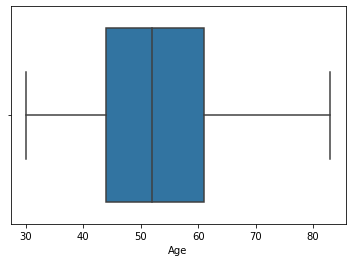

In [8]:
sns.boxplot(x=hab.Age)

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

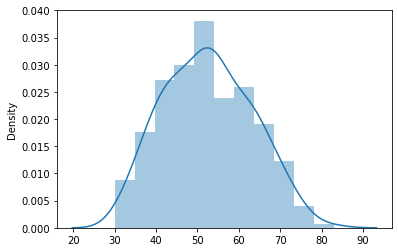

In [9]:
sns.distplot(x=hab.Age)

In [10]:
# age is normally distributed in the dataset

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

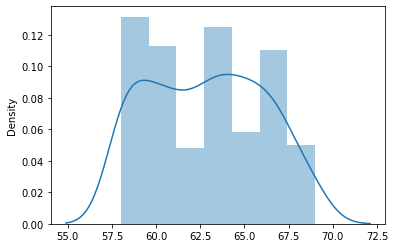

In [11]:
sns.distplot(x=hab.Year)

In [12]:
# We have data that says that this data was collected based on results between 1958 and 1969

<AxesSubplot:ylabel='AuxNodes'>

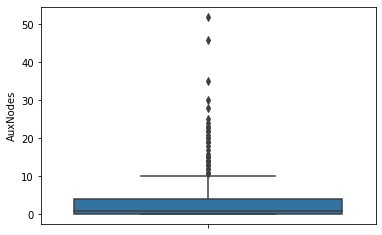

In [13]:
sns.boxplot(y=hab.AuxNodes)

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

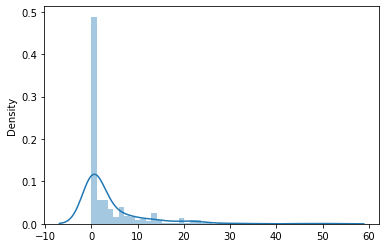

In [14]:
sns.distplot(x=hab.AuxNodes)

In [15]:
# This distribution has a long tail. Let's check the skewness kurtosis.

In [16]:
hab.AuxNodes.skew()

2.9776817337612087

In [17]:
hab.AuxNodes.kurt()

11.683749814475584

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survival', ylabel='count'>

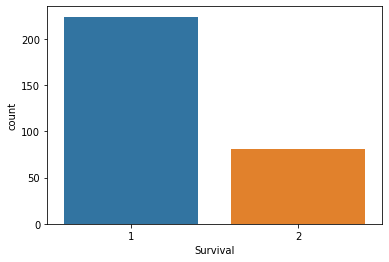

In [18]:
sns.countplot('Survival',data=hab)

In [19]:
# please note that in this data set, the survival key means
# 1 = Survived the year of treatment
# 2 = Survived 5 years of treatment
# What we want to find is what is the impact of number of nodes on survival modes 1 and 2

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survival', ylabel='count'>

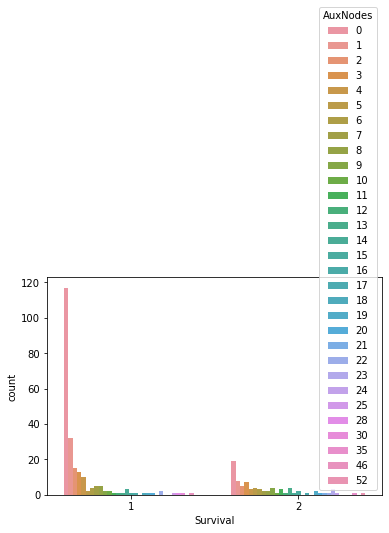

In [20]:
sns.countplot('Survival',data=hab,hue='AuxNodes')

In [21]:
# This is not readable. Let's try a different plot

<AxesSubplot:xlabel='Survival', ylabel='AuxNodes'>

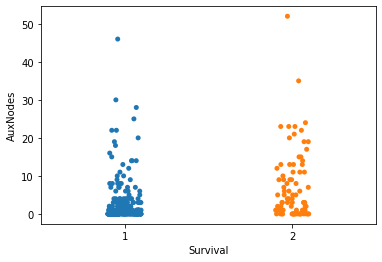

In [22]:
sns.stripplot(x='Survival',y='AuxNodes',data=hab)

In [23]:
# at the first look, there does not seem to be a major difference.
# But, we know that survival 1 is much greater than survival 2

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survival', ylabel='AuxNodes'>

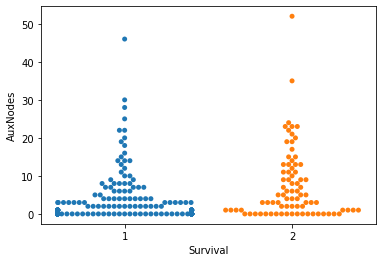

In [24]:
sns.swarmplot(x='Survival',y='AuxNodes',data=hab)

<AxesSubplot:xlabel='Age', ylabel='Count'>

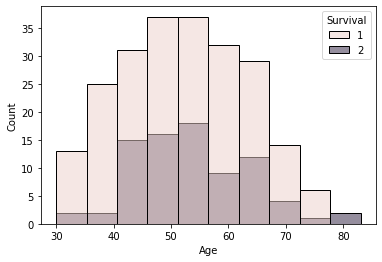

In [25]:
sns.histplot(x='Age',bins=10,data=hab,hue='Survival')

In [26]:
# as we can see, survival = 2 is almost equally distributed across ages, except for the last age bin
# now, lets see it against number of nodes

<AxesSubplot:xlabel='AuxNodes', ylabel='Count'>

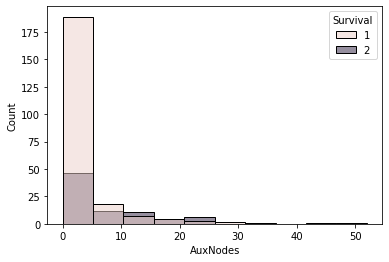

In [27]:
sns.histplot(x='AuxNodes',bins=10,data=hab,hue='Survival')

In [28]:
#let's remove nodes=0
hab1=hab[hab['AuxNodes']>0]
hab1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       169 non-null    int64
 1   Year      169 non-null    int64
 2   AuxNodes  169 non-null    int64
 3   Survival  169 non-null    int64
dtypes: int64(4)
memory usage: 6.6 KB


<AxesSubplot:xlabel='AuxNodes', ylabel='Count'>

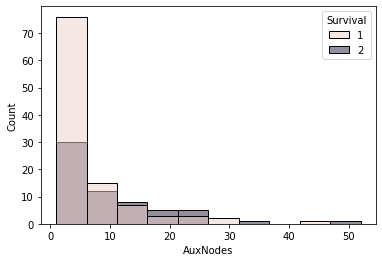

In [29]:
sns.histplot(x='AuxNodes',bins=10,data=hab1,hue='Survival')

In [30]:
# strangely, this shows that the number of survivors at 5 years are more as the number of nodes increases
# Let's look at the new data with age dist

<AxesSubplot:xlabel='Age', ylabel='Count'>

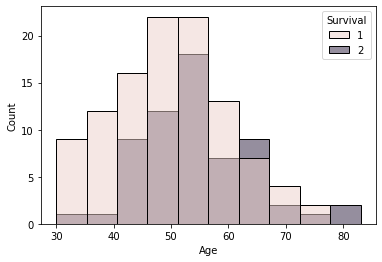

In [31]:
sns.histplot(x='Age',bins=10,data=hab1,hue='Survival')

In [32]:
# more people see to have survived past 5 years that the first year in ages around 65 and 80

In [33]:
# Let's do a scatter plot between age and nodes

<AxesSubplot:xlabel='Age', ylabel='AuxNodes'>

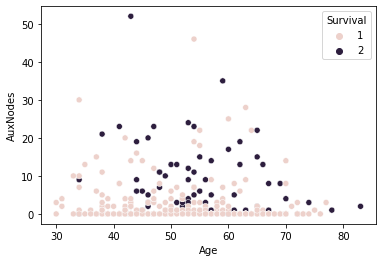

In [34]:
# for the original data
sns.scatterplot(data=hab,x='Age',y='AuxNodes',hue='Survival')

<AxesSubplot:xlabel='Age', ylabel='AuxNodes'>

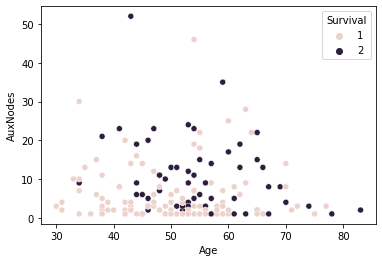

In [35]:
# for the data filteredout for 0 nodes
sns.scatterplot(data=hab1,x='Age',y='AuxNodes',hue='Survival')

In [36]:
# number of nodes seems to be correlated to age and the surivival value 2
#let's do a count plot / groupby

<AxesSubplot:xlabel='Age', ylabel='count'>

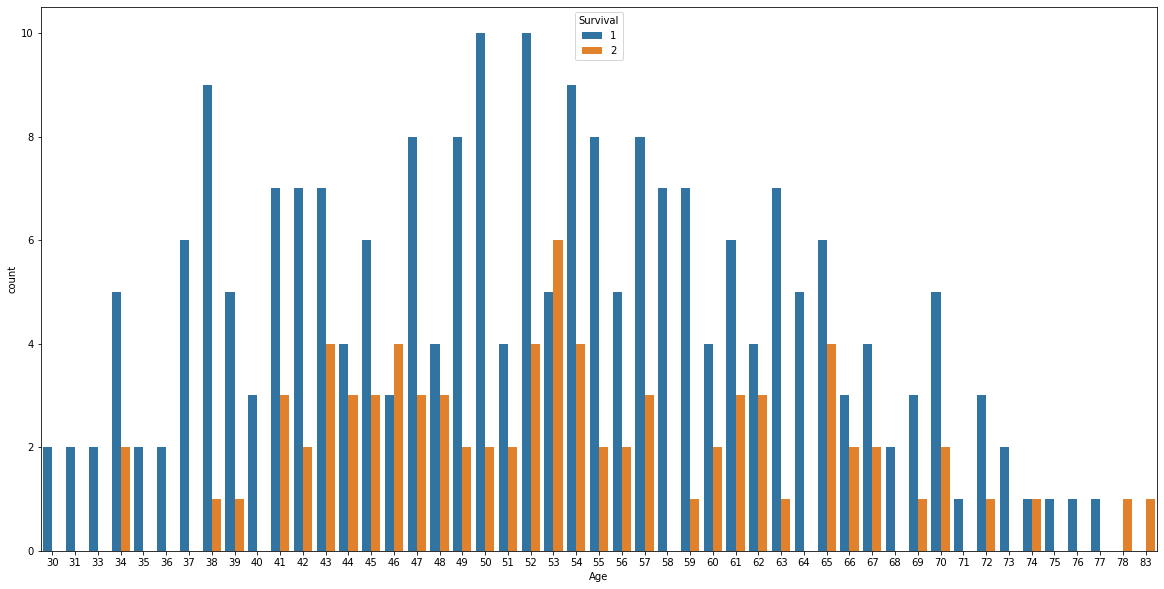

In [37]:
# for the original data
f, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=hab,x='Age',hue='Survival')

<AxesSubplot:xlabel='AuxNodes', ylabel='count'>

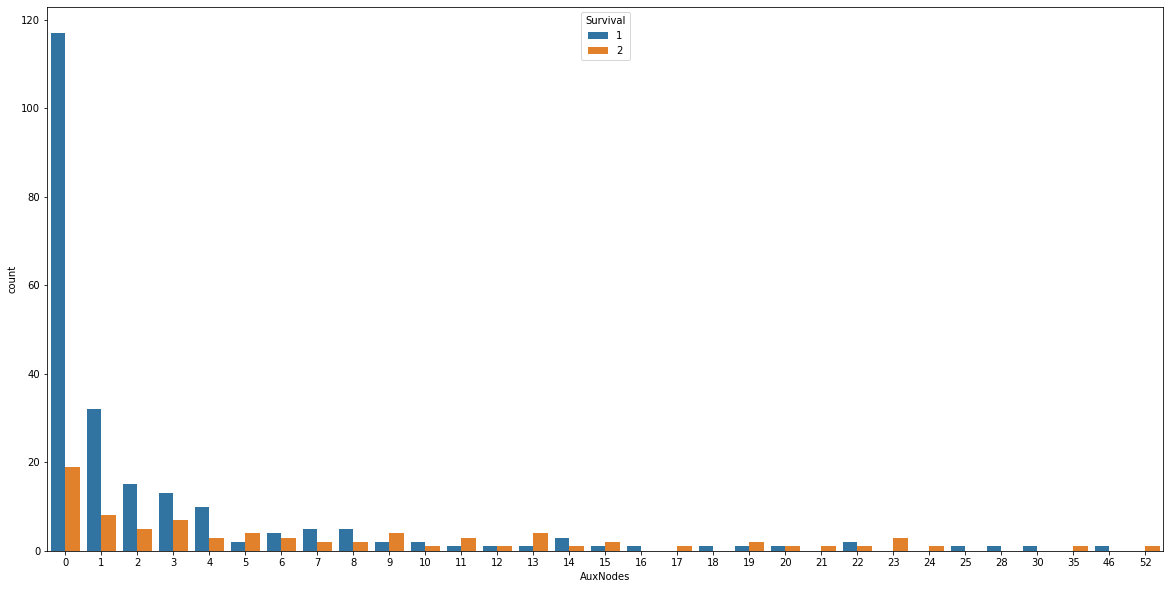

In [38]:
# for the original data
f, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=hab,x='AuxNodes',hue='Survival')

<AxesSubplot:xlabel='Year', ylabel='count'>

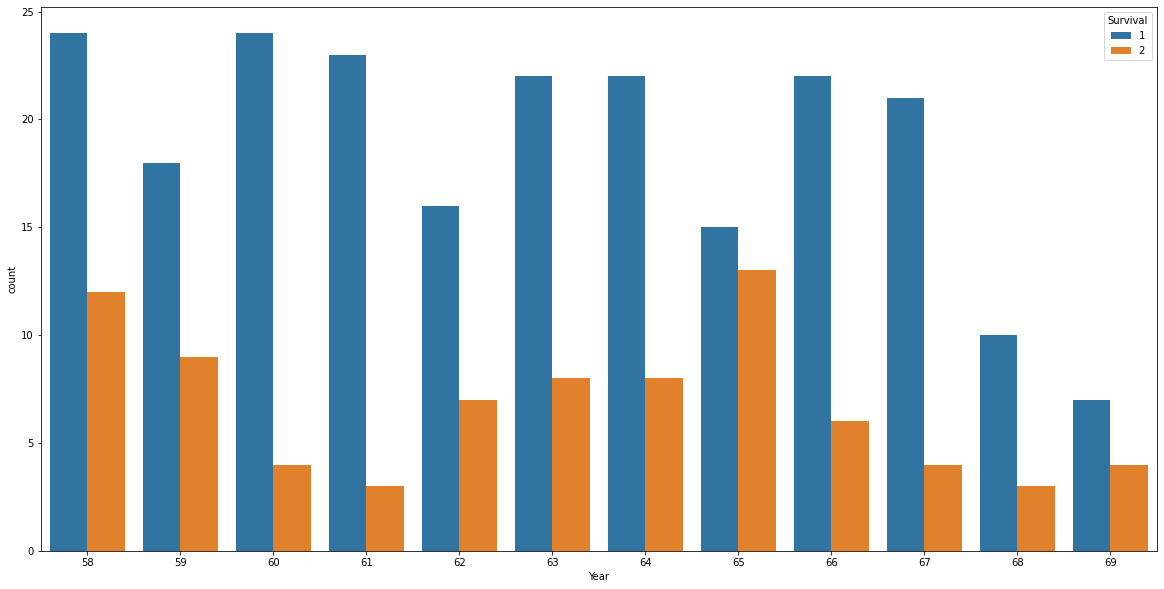

In [39]:
# for the original data
f, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=hab,x='Year',hue='Survival')

In [40]:
hab.describe()

,Age,Year,AuxNodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [41]:
# On average, poeple have has 4 AuxNodes
# The average age of patients is 52

<AxesSubplot:xlabel='Survival', ylabel='Age'>

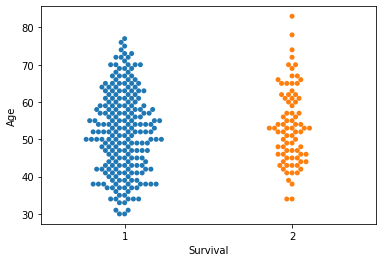

In [42]:
sns.swarmplot(x='Survival',y='Age',data=hab)

<AxesSubplot:xlabel='Survival', ylabel='Age'>

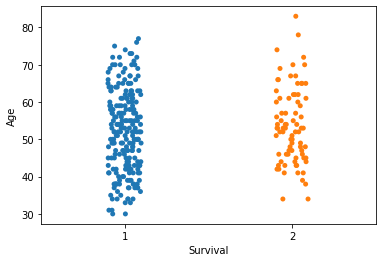

In [43]:
sns.stripplot(x='Survival',y='Age',data=hab)

In [45]:
import sweetviz as sv
hab_sv_eda_report = sv.analyze(hab)
hab_sv_eda_report.show_html('hab_sv_eda_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report hab_sv_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
